In [219]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import butter, cheby1, lfilter

os.makedirs("./lab6/lab6_plots", exist_ok=True)

Ex1

B = 0.5, T = 1.0, t_n = [-3. -2. -1.  0.  1.  2.  3.]
B = 0.5, T = 0.6666666666666666, t_n = [-2.66666667 -2.         -1.33333333 -0.66666667  0.          0.66666667
  1.33333333  2.          2.66666667]
B = 0.5, T = 0.5, t_n = [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
B = 0.5, T = 0.25, t_n = [-3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.  ]
B = 1, T = 1.0, t_n = [-3. -2. -1.  0.  1.  2.  3.]
B = 1, T = 0.6666666666666666, t_n = [-2.66666667 -2.         -1.33333333 -0.66666667  0.          0.66666667
  1.33333333  2.          2.66666667]
B = 1, T = 0.5, t_n = [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
B = 1, T = 0.25, t_n = [-3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.  ]
B = 3, T = 1.0, t_n = [-3. -2. -1.  0.  1.  2.  3.]
B = 3, T

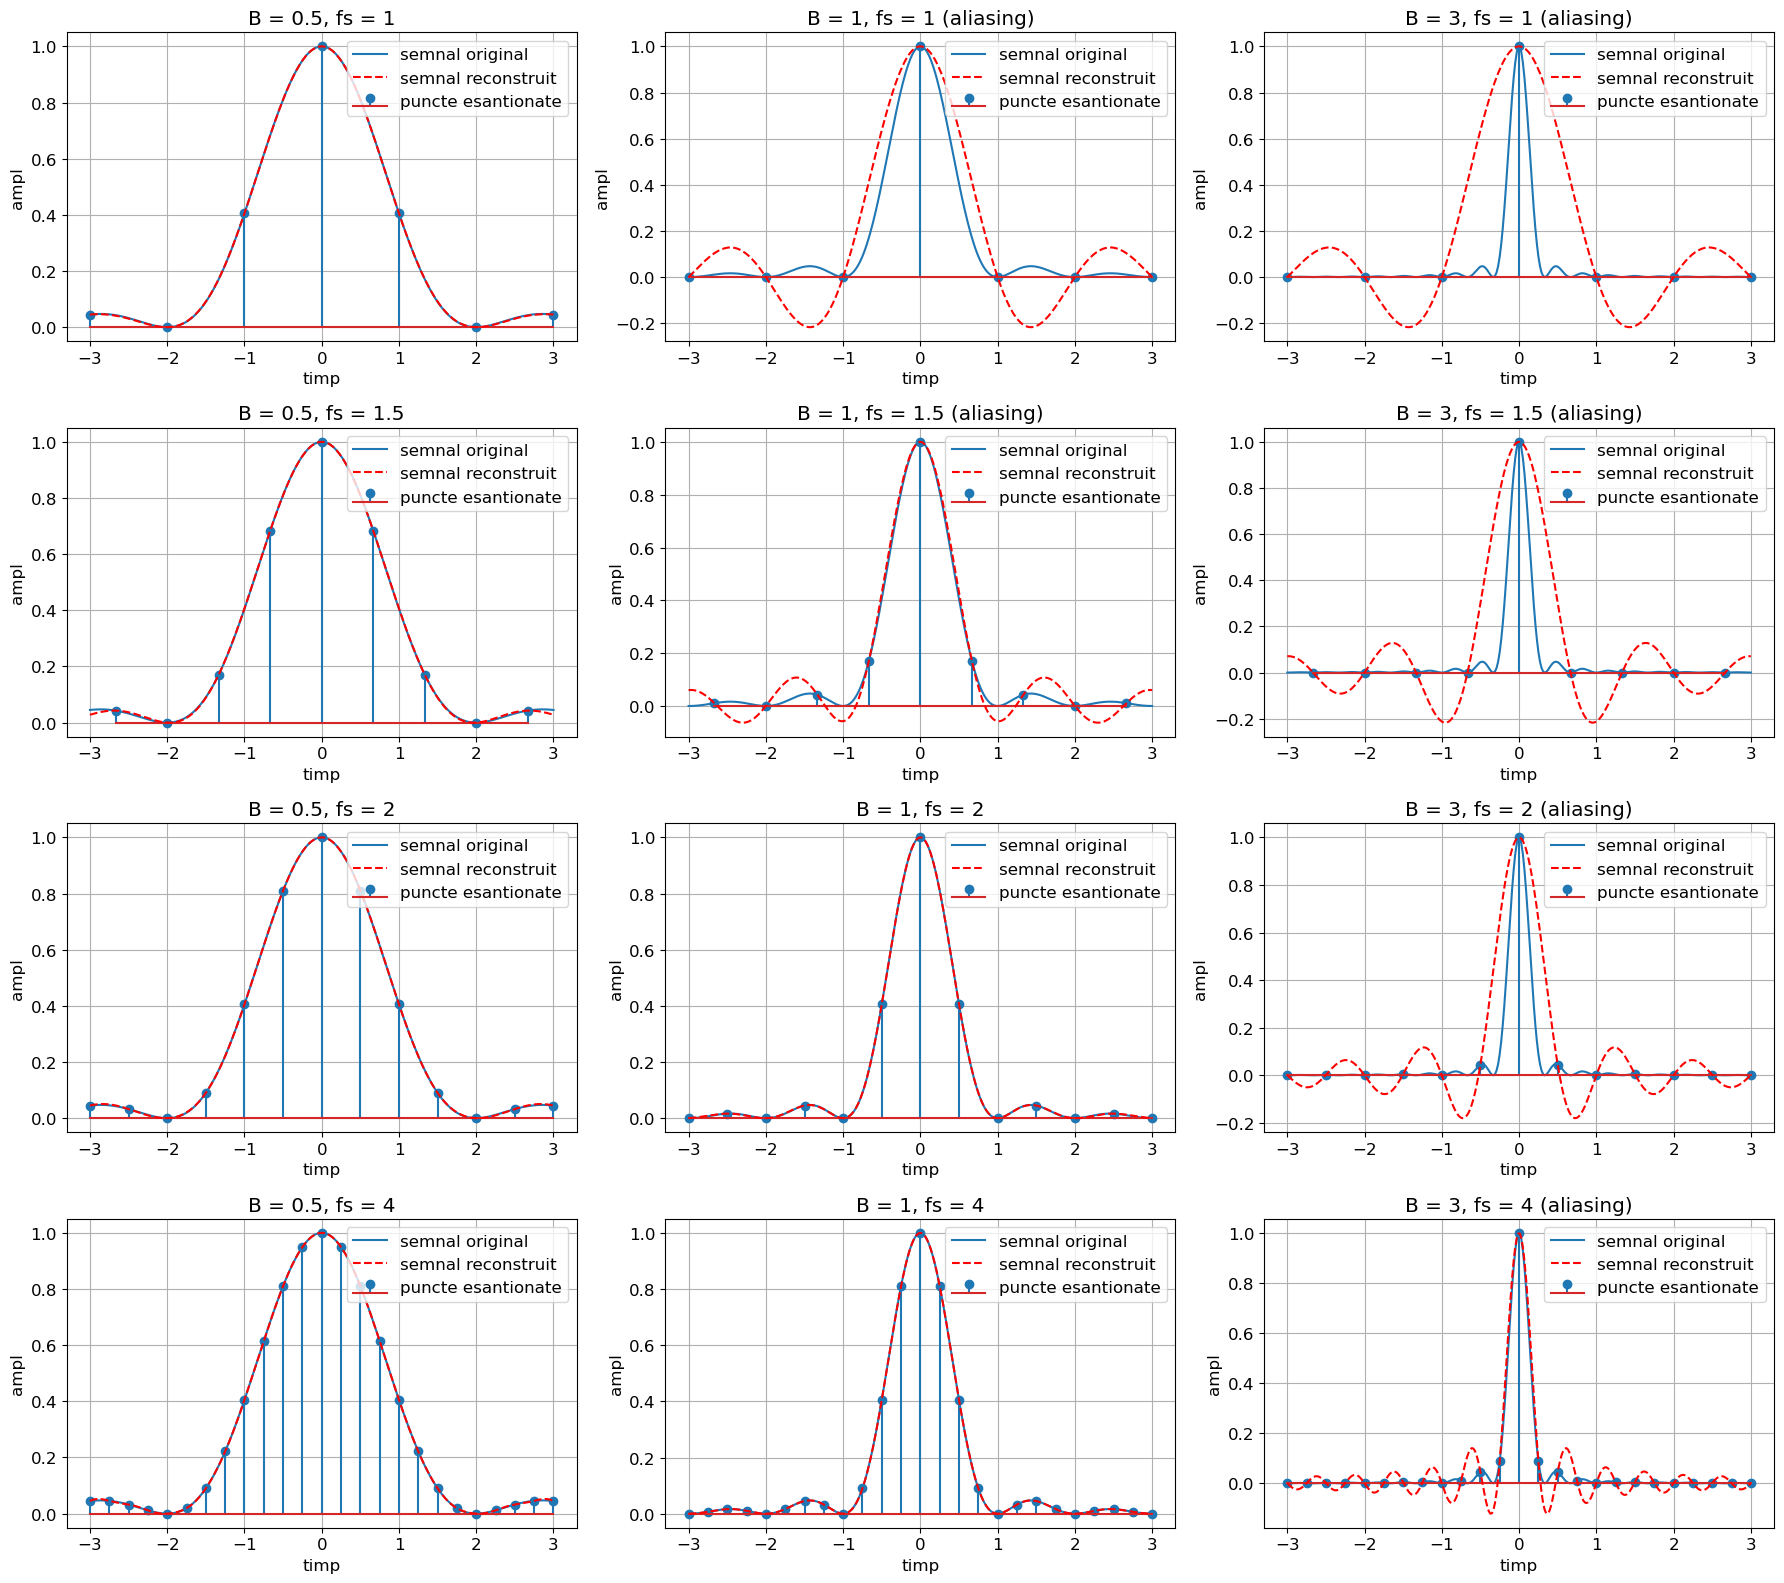

In [220]:
os.makedirs("lab6/lab6_plots/ex1", exist_ok=True)

rata_esantionare = 300
t = np.linspace(-3, 3, rata_esantionare)
L_fs = [1, 1.5, 2, 4] # lista frecv de esantionare
L_B = [0.5, 1, 3]

fig, axs = plt.subplots(len(L_fs), len(L_B), figsize=(18, 16))
for j, B in enumerate(L_B): # i linie, j coloana
    x = np.sinc(B*t)**2
    rata_nyquist = B*2
    for i, fs in enumerate(L_fs):
        T = 1/fs # perioada esantionare
        
        nr_pcte = int(3/T)
        # partea stg, 0, partea dr
        # partea dr (inclusiv 0): nr de puncte de la 0 la 3
        # partea stg (exclusiv 0): de la -T la -3
        t_stg = -np.arange(T, (nr_pcte+1)*T, T)[:nr_pcte] # t_n = n*T discretizat
        t_dr = np.arange(0, (nr_pcte+1)*T, T)[:nr_pcte+1]
        t_n = np.unique(np.concatenate([t_stg, t_dr]))
        print(f"B = {B}, T = {T}, t_n = {t_n}")
        x_n = np.sinc(B*t_n)**2

        x_reconstruit = np.zeros_like(t)
        for n, (tn, xn) in enumerate(zip(t_n, x_n)):
            x_reconstruit += xn*np.sinc((t-tn)/T)

        ax = axs[i, j]
        ax.plot(t, x, label=f'semnal original')
        ax.stem(t_n, x_n, label=f'puncte esantionate')
        ax.plot(t, x_reconstruit, 'r--', label=f'semnal reconstruit')
        nume = f'B = {B}, fs = {fs}'
        if fs < rata_nyquist: # fs < 2*B
            nume += ' (aliasing)'
        ax.set_title(nume)
        ax.set_xlabel('timp')
        ax.set_ylabel('ampl')
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.savefig(fname="./lab6/lab6_plots/ex1/comparatie_esantionare_si_reconstructie_valori_diferite_B.pdf", format="pdf")
plt.show()

Ex2

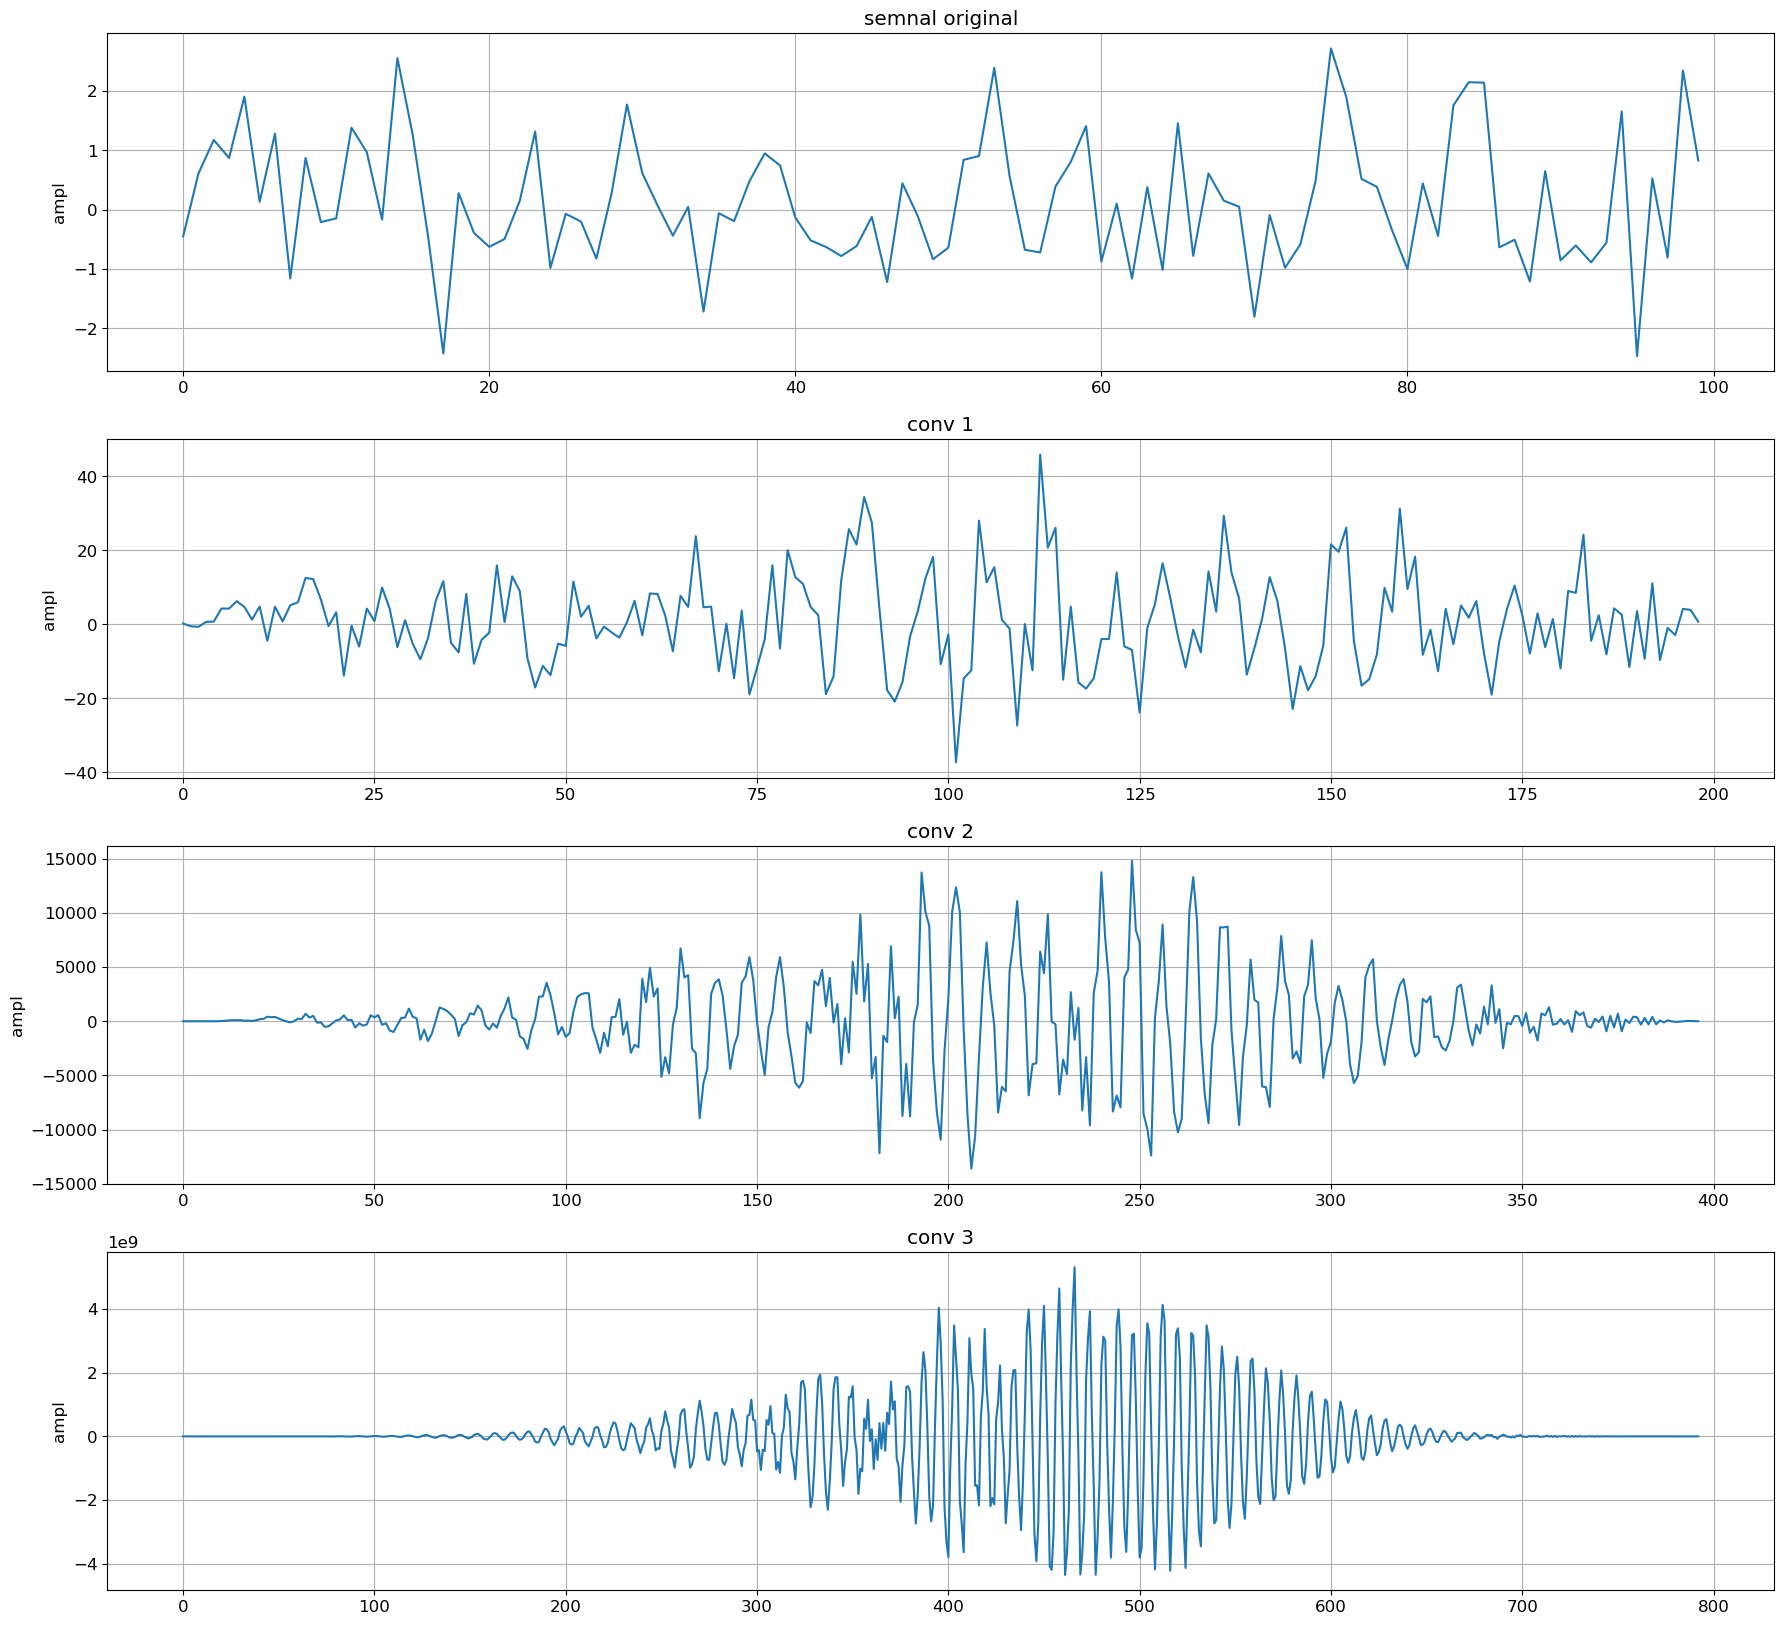

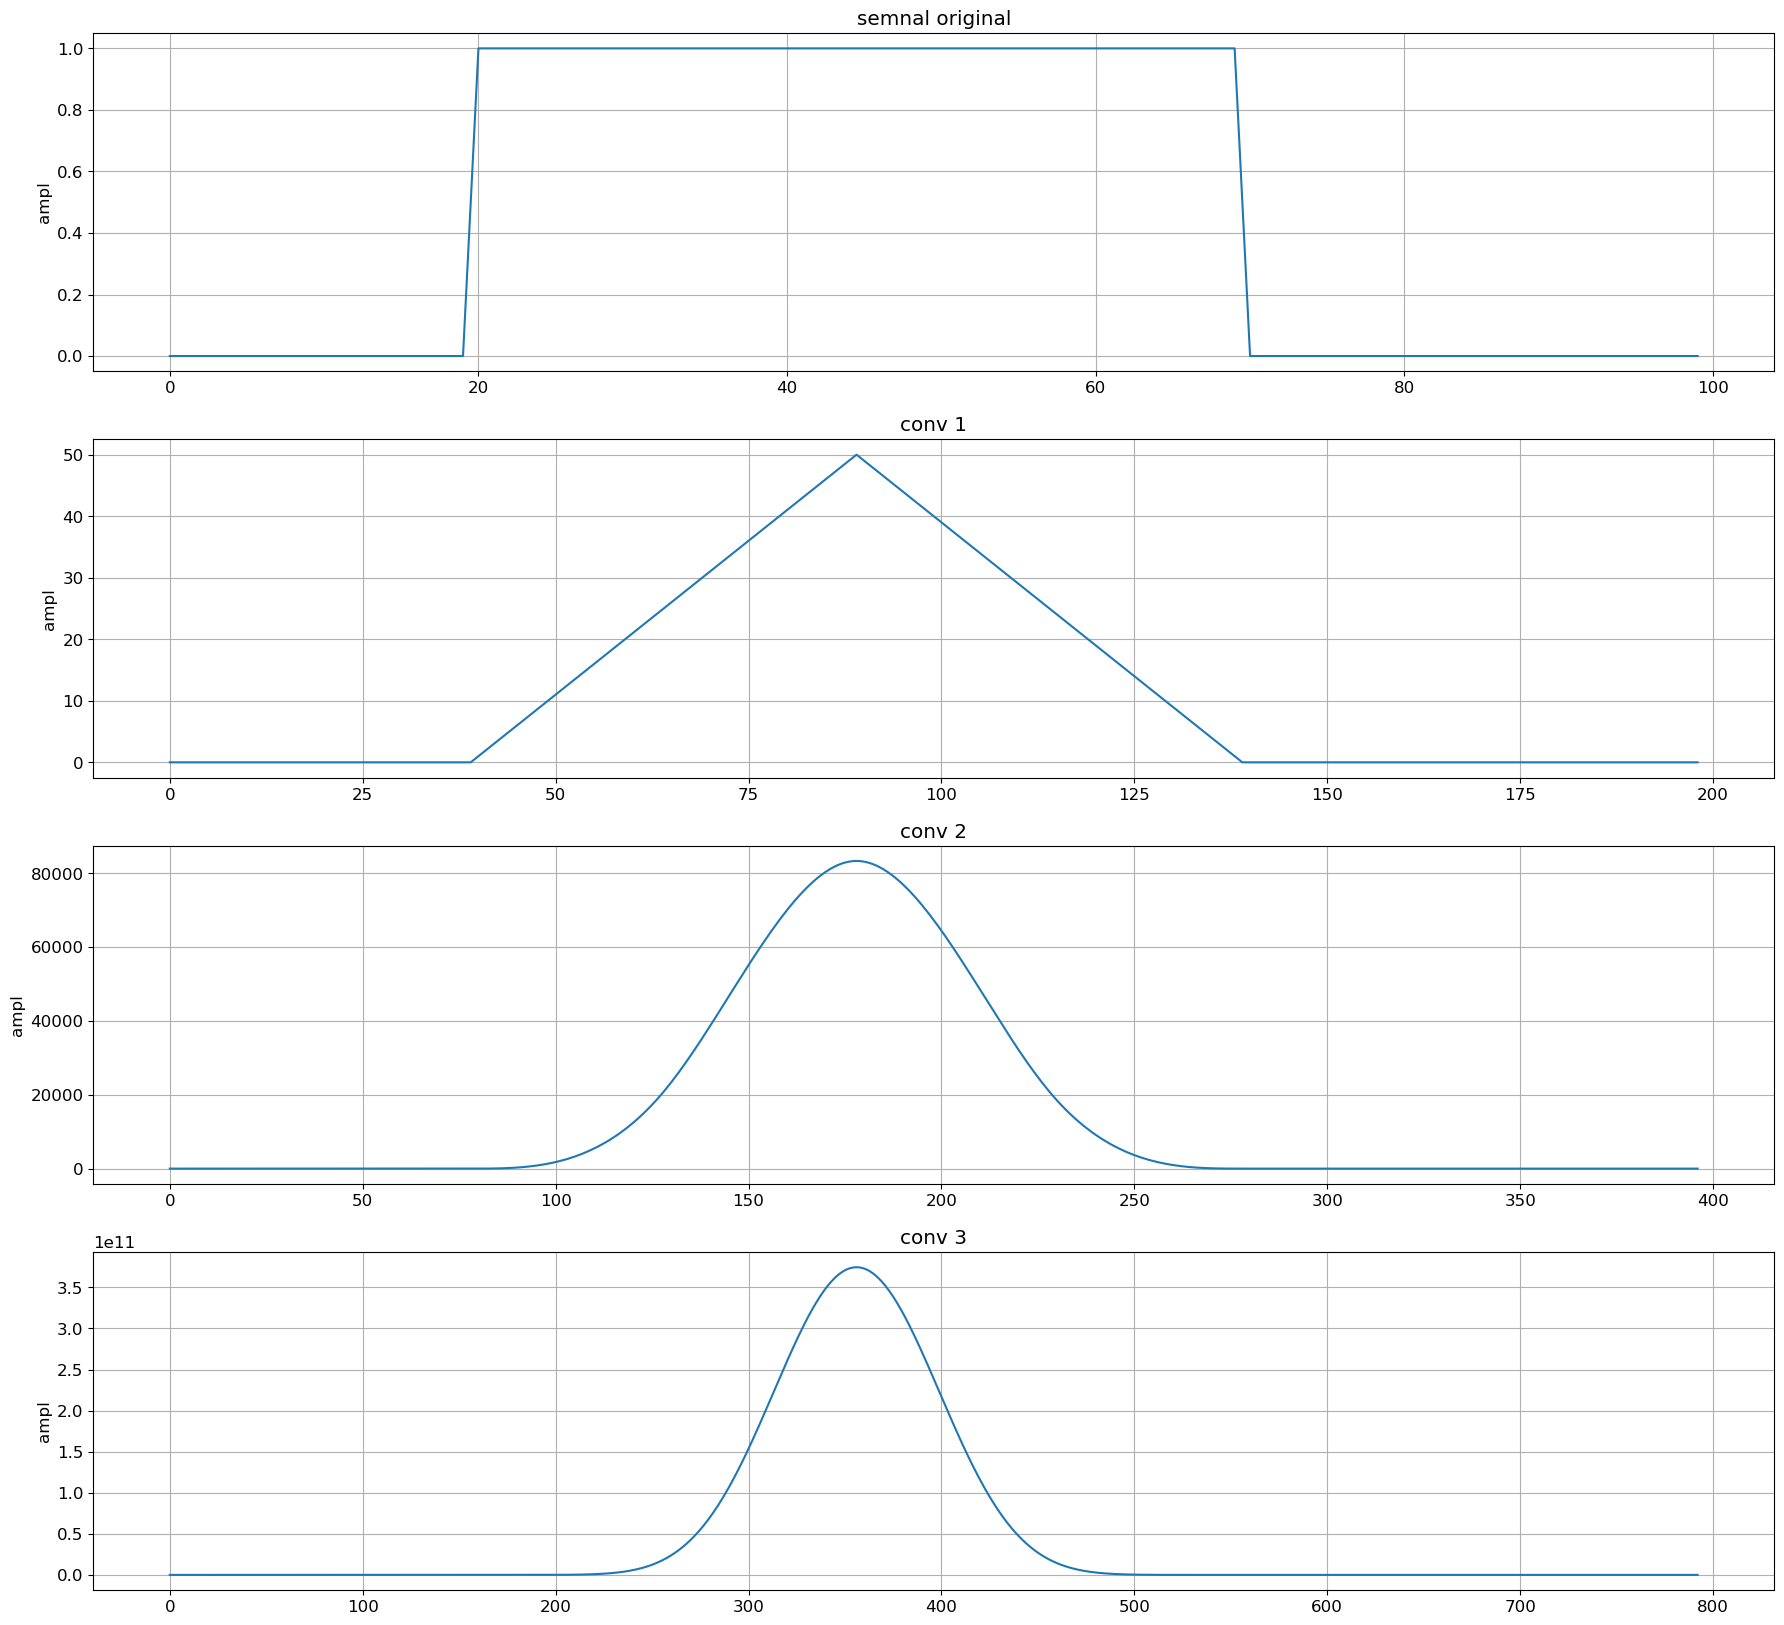

In [221]:
# se observa cum comp de frecv mari sunt filtrate, mai exact la scara mica cum e in cazul semnalului bloc rectangular, din cauza faptului ca o convolutie presupune 
# o inversare a axei timpului, urmata de o deplasare a coef si o suma de produse

os.makedirs("lab6/lab6_plots/ex2", exist_ok=True)

N = 100
x = np.random.randn(N) # semnal random
nr_conv = 3 # 3 convolutii x**2

fig, axs = plt.subplots(nr_conv+1, 1, figsize=(18, 16))
for i, ax in enumerate(axs):
    if i==0:
        ax.plot(x)
        ax.set_title('semnal original')
    else:
        x = np.convolve(x, x, mode='full')
        ax.plot(x)
        ax.set_title(f'conv {i}')
    ax.set_ylabel('ampl')
    ax.grid(True)
plt.tight_layout()
plt.subplots_adjust(top=1)
plt.savefig(fname="./lab6/lab6_plots/ex2/convolutii_semnal_random.pdf", format="pdf")
plt.show()

x_rect = np.zeros(N)
x_rect[20:70] = 1

fig, axs = plt.subplots(nr_conv+1, 1, figsize=(18, 16))
for i, ax in enumerate(axs):
    if i==0:
        ax.plot(x_rect)
        ax.set_title('semnal original')
    else:
        x_rect = np.convolve(x_rect, x_rect, mode='full')
        ax.plot(x_rect)
        ax.set_title(f'conv {i}')
    ax.set_ylabel('ampl')
    ax.grid(True)
plt.tight_layout()
plt.subplots_adjust(top=1)
plt.savefig(fname="./lab6/lab6_plots/ex2/convolutii_semnal_bloc_rectangular.pdf", format="pdf")
plt.show()

Ex3

In [222]:
def spit_it_out(L_coef):
    termen = ""
    for i, coef in enumerate(L_coef):
        abs_coef = abs(coef)
        if i == 0:
            termen += f"{coef}"
        else:
            semn = " - " if coef < 0 else " + "
            if i == 1:
                termen += f"{semn}{abs_coef}x"
            else:
                termen += f"{semn}{abs_coef}x**{i}"
    return termen

N = 5 # grad maxim polinoame
L_coef_p = np.random.randint(-25, 25, N+1)
L_coef_q = np.random.randint(-25, 25, N+1)

print(f"p(x) = {spit_it_out(L_coef_p)}")
print(f"q(x) = {spit_it_out(L_coef_q)}", end="\n\n")

M = len(L_coef_p)+len(L_coef_q)-1
L_coef_r_conv = np.zeros(M)
for i in range(len(L_coef_p)):
    for j in range(len(L_coef_q)):
        L_coef_r_conv[i+j] += L_coef_p[i]*L_coef_q[j]
print(f"multiplicare polinoame folosind convolutia: r(x) = p(x)*q(x) = {L_coef_r_conv}")
print(f"r(x) = {spit_it_out(L_coef_r_conv)}")

L_coef_p_fft = np.fft.fft(L_coef_p, M)
L_coef_q_fft = np.fft.fft(L_coef_q, M)
L_coef_r_fft = L_coef_p_fft*L_coef_q_fft # domeniu frecv fft
L_coef_r_fft = np.fft.ifft(L_coef_r_fft) # neaparat inversare fft pt domeniu timp
print(f"multiplicare polinoame folosind fft: r(x) = p(x) * q(x) = {np.real(L_coef_r_fft)}")
print(f"r(x) = {spit_it_out(np.real(L_coef_r_fft))}")

p(x) = 19 - 25x - 11x**2 - 24x**3 - 4x**4 + 1x**5
q(x) = -8 + 14x - 7x**2 + 23x**3 - 2x**4 - 19x**5

multiplicare polinoame folosind convolutia: r(x) = p(x)*q(x) = [-152.  466. -395.  650. -840. -460.  -13.  158.  487.   74.  -19.]
r(x) = -152.0 + 466.0x - 395.0x**2 + 650.0x**3 - 840.0x**4 - 460.0x**5 - 13.0x**6 + 158.0x**7 + 487.0x**8 + 74.0x**9 - 19.0x**10
multiplicare polinoame folosind fft: r(x) = p(x) * q(x) = [-152.  466. -395.  650. -840. -460.  -13.  158.  487.   74.  -19.]
r(x) = -152.00000000000006 + 465.99999999999983x - 394.99999999999994x**2 + 649.9999999999999x**3 - 839.9999999999999x**4 - 459.99999999999994x**5 - 13.000000000000083x**6 + 157.99999999999997x**7 + 487.0000000000001x**8 + 74.0x**9 - 18.99999999999996x**10


Ex4

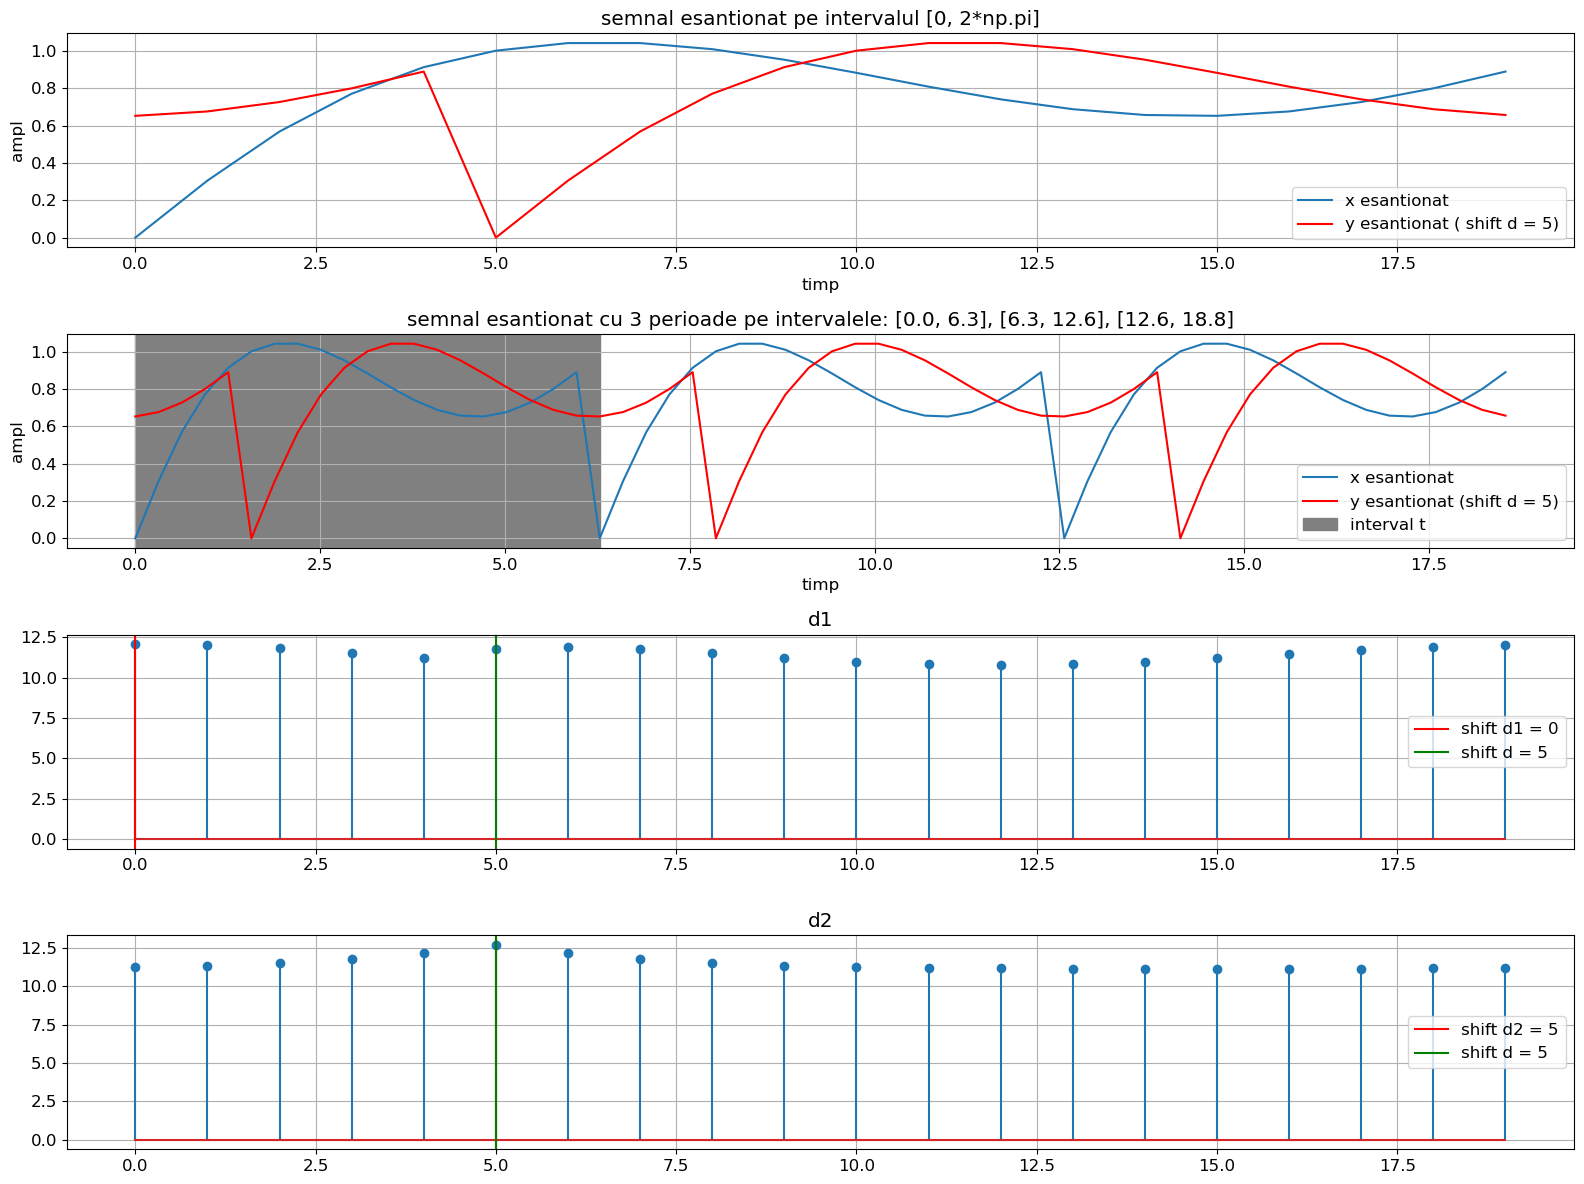

In [223]:
os.makedirs("lab6/lab6_plots/ex4", exist_ok=True)

n = 20
t = np.linspace(0, 2*np.pi, n, endpoint=False)
x = 0.3*np.sin(t)+0.7*np.arctan(t)
d = 5
y = np.roll(x, d) # shift circular

d1_rezultat = np.fft.ifft(np.fft.fft(x) * np.fft.fft(y))
d1_recuperat = np.argmax(np.abs(np.fft.ifft(np.fft.fft(x) * np.fft.fft(y))))
d2_rezultat = np.fft.ifft(np.conj(np.fft.fft(x))*np.fft.fft(y))
d2_recuperat = np.argmax(np.abs(np.fft.ifft(np.conj(np.fft.fft(x))*np.fft.fft(y))))

fig, axs = plt.subplots(4, 1, figsize=(16, 12))

axs[0].plot(x, label='x esantionat')
axs[0].plot(y, color='red', label=f'y esantionat ( shift d = {d})')
axs[0].set_title('semnal esantionat pe intervalul [0, 2*np.pi]')
axs[0].set_xlabel('timp')
axs[0].set_ylabel('ampl')
axs[0].legend()
axs[0].grid(True)

nr_perioade = 3 # pt a arata circularitate perioadei
t_ext = np.linspace(0, nr_perioade*2*np.pi, 1000*nr_perioade) # t extins
x_continuous = 0.3*np.sin(t_ext) + 0.7*np.arctan(t_ext)
t_n_ext = [] # esantionat, nu continuu
x_n_ext = []
y_n_ext = []
for perioada in range(nr_perioade):
    offset = perioada*2*np.pi
    t_perioada = t+offset
    t_n_ext.extend(t_perioada)
    x_n_ext.extend(x)
    y_n_ext.extend(np.roll(x, d))

axs[1].plot(t_n_ext, x_n_ext, label='x esantionat')
axs[1].plot(t_n_ext, y_n_ext, color='red', label=f'y esantionat (shift d = {d})')
axs[1].axvspan(0, 2*np.pi, color='gray', label='interval t')
L_intervale = []
for i in range(nr_perioade):
    L_intervale.append(f"[{2*i*np.pi:.1f}, {2*(i+1)*np.pi:.1f}]")
axs[1].set_title(f'semnal esantionat cu {nr_perioade} perioade pe intervalele: {", ".join(L_intervale)}')
axs[1].set_xlabel('timp')
axs[1].set_ylabel('ampl')
axs[1].legend()
axs[1].grid(True)

axs[2].stem(np.abs(d1_rezultat))
axs[2].axvline(x=d1_recuperat, color='red', label=f'shift d1 = {d1_recuperat}')
axs[2].axvline(x=d, color='green', label=f'shift d = {d}')
axs[2].set_title('d1')
axs[2].legend()
axs[2].grid(True)

axs[3].stem(np.abs(d2_rezultat))
axs[3].axvline(x=d2_recuperat, color='red', label=f'shift d2 = {d2_recuperat}')
axs[3].axvline(x=d, color='green', label=f'shift d = {d}')
axs[3].set_title('d2')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.savefig(fname="./lab6/lab6_plots/ex4/shift_circular_semnal.pdf", format="pdf")
plt.show()

Ex5

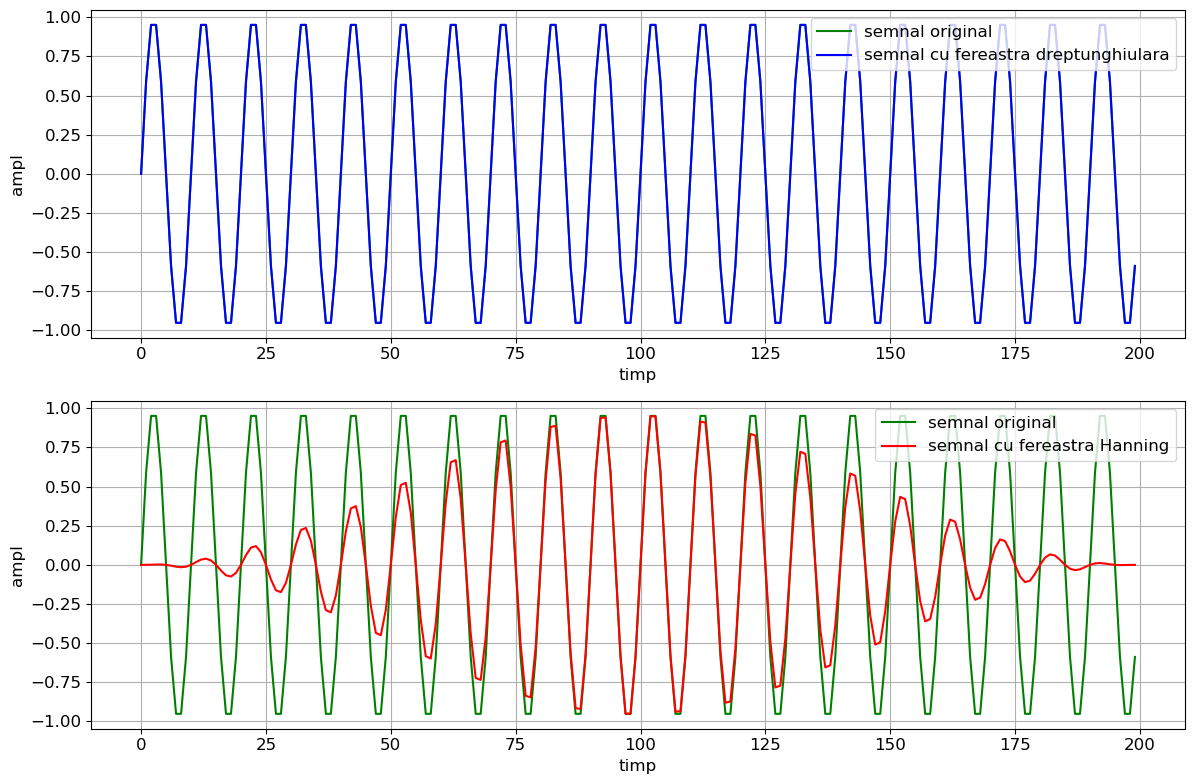

In [224]:
os.makedirs("lab6/lab6_plots/ex5", exist_ok=True)

f = 100
ampl = 1
faza = 0
Nw = 200 # dim ferestrei
fs = 1000 # frecv esantionare
t = np.arange(Nw)/fs
sinusoida = ampl*np.sin(2*np.pi*f*t+faza)

fereastra_dr = np.ones(Nw) # dreptunghiulara
sinusoida_dr = sinusoida*fereastra_dr
fereastra_hn = 0.5*(1-np.cos(2*np.pi*np.arange(Nw)/(Nw-1))) # Hanning
sinusoida_hn = sinusoida*fereastra_hn

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(t*1000, sinusoida, color='green', label='semnal original')
axs[0].plot(t*1000, sinusoida_dr, color='blue', label='semnal cu fereastra dreptunghiulara')
axs[0].set_xlabel('timp')
axs[0].set_ylabel('ampl')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t*1000, sinusoida, color='green', label='semnal original')
axs[1].plot(t*1000, sinusoida_hn, color='red', label='semnal cu fereastra Hanning')
axs[1].set_xlabel('timp')
axs[1].set_ylabel('ampl')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig(fname="./lab6/lab6_plots/ex5/semnal_ferestre_Hanning_si_dreptunghiulara.pdf", format="pdf")
plt.show()

Ex6

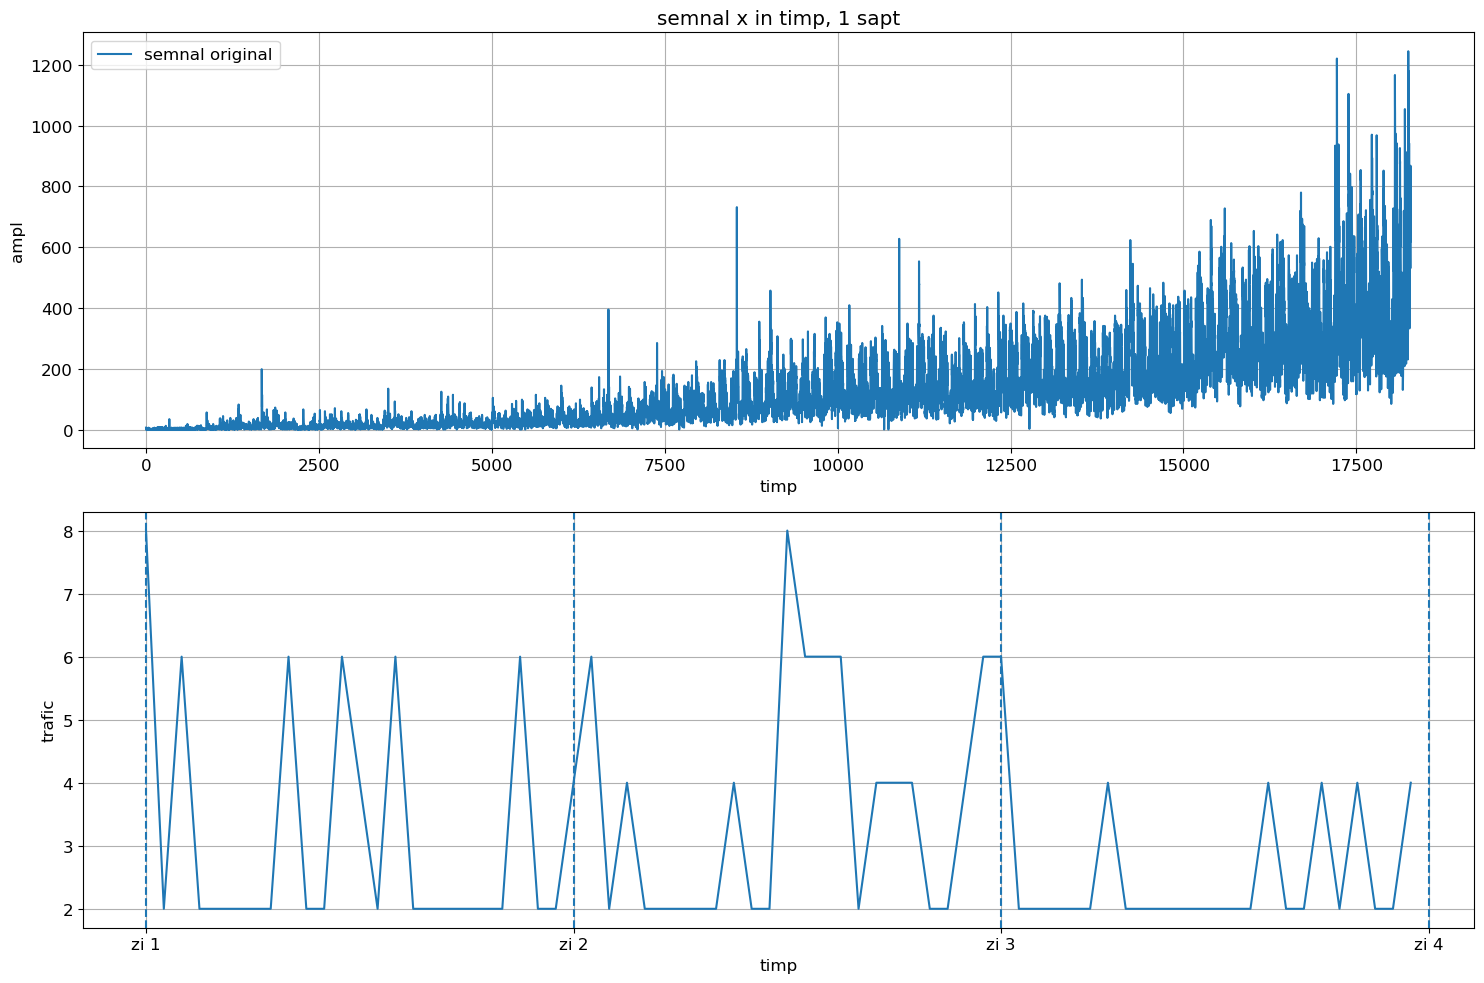

In [231]:
os.makedirs("lab6/lab6_plots/ex6", exist_ok=True)

# a)
os.makedirs("lab6/lab6_plots/ex6/a", exist_ok=True)

x = np.genfromtxt('./lab6/Train.csv', delimiter=',')
x = x[:, 2] # coloana 2
x = x[1:] # evit linia pe care sunt definite coloanele
N = len(x)

dt = 3600 # secunde per esantion
t = np.arange(N)*dt/3600 # conversie ore
# voi plota t cu x original

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].plot(t, x, label='semnal original')
axs[0].set_title('semnal x in timp, 1 sapt')
axs[0].set_xlabel('timp')
axs[0].set_ylabel('ampl')
axs[0].legend()
axs[0].grid(True)

x_3_zile = x[0:72]
t_3_zile = t[0:72]

axs[1].plot(t_3_zile, x_3_zile)
axs[1].set_xlabel('timp')
axs[1].set_ylabel('trafic')
axs[1].grid(True)
nr_zile = 3
esantioane_zi = 24
L_tick_zi = [0+i*esantioane_zi for i in range(nr_zile+1)]
L_label_zi = [f'zi {i+1}' for i in range(nr_zile+1)]
axs[1].set_xticks(L_tick_zi, L_label_zi)
for tick in L_tick_zi:
    axs[1].axvline(x=tick, linestyle='--')
plt.tight_layout()
plt.savefig("./lab6/lab6_plots/ex6/a/trafic_3_zile.pdf", format='pdf')
plt.show()

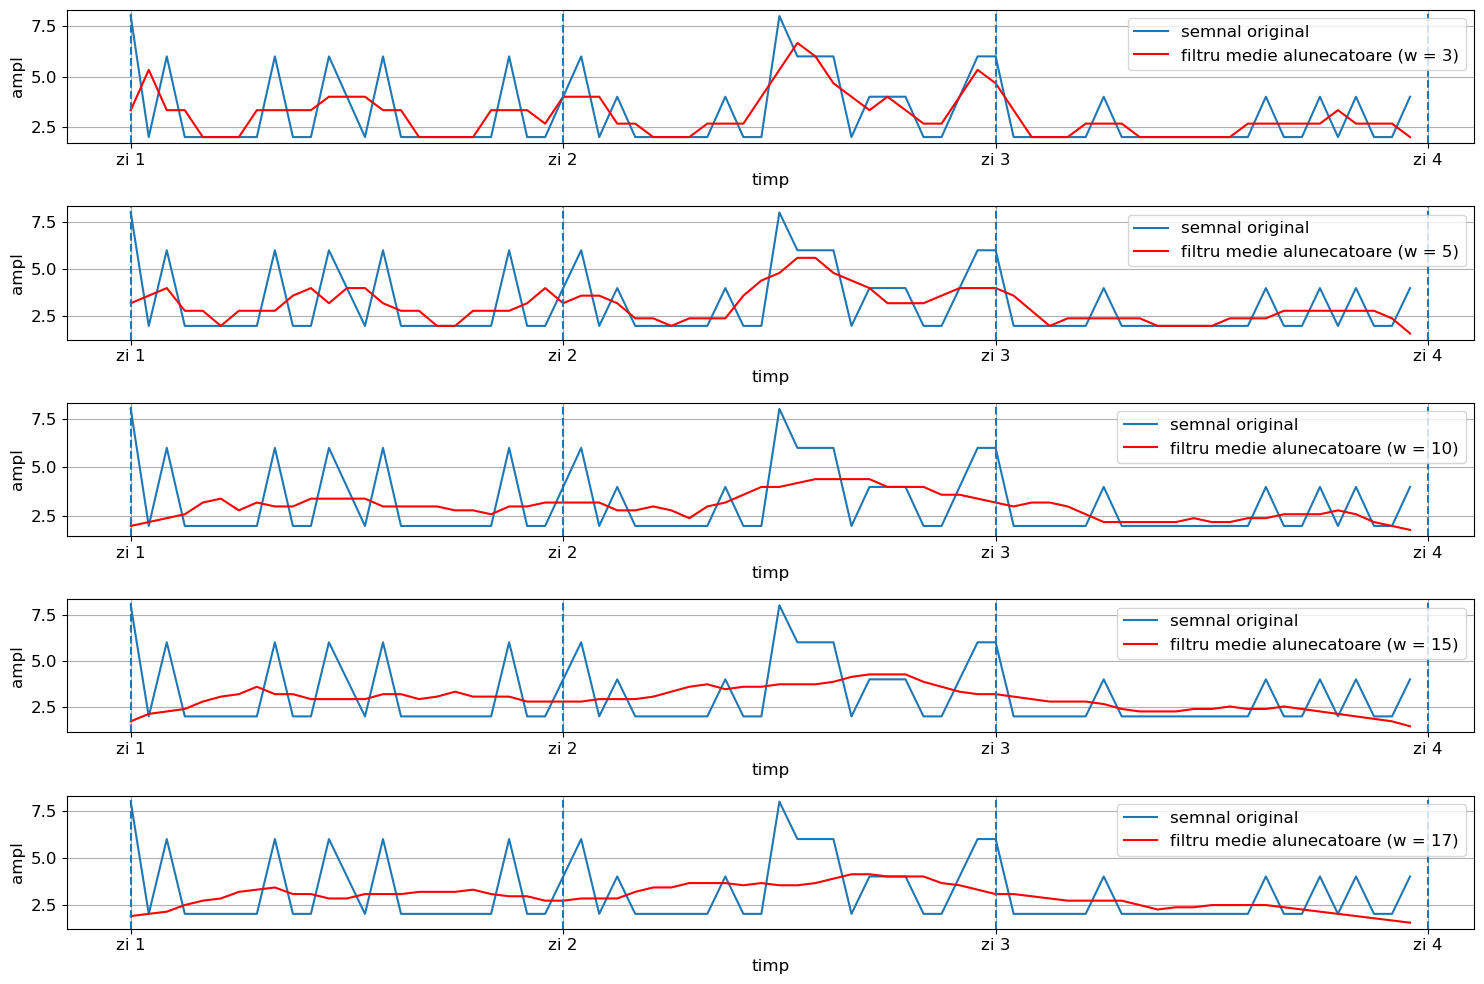

In [226]:
# b)
os.makedirs("lab6/lab6_plots/ex6/b", exist_ok=True)

L_w = [3, 5, 10, 15, 17]

fig, axs = plt.subplots(len(L_w), 1, figsize=(15, 10))

for ax in axs:
    ax.plot(t_3_zile, x_3_zile, label='semnal original')

for i, w in enumerate(L_w):
    x_filtrat = np.convolve(x_3_zile, np.ones(w)/w, 'same') # parametrul de same pentru a pastra lungimea semnalului
    
    axs[i].plot(t_3_zile, x_filtrat, color='red', label=f'filtru medie alunecatoare (w = {w})')
    axs[i].set_xlabel('timp')
    axs[i].set_ylabel('ampl')
    axs[i].grid(True)
    axs[i].legend()
    nr_zile = 3
    esantioane_zi = 24
    L_tick_zi = [0+i*esantioane_zi for i in range(nr_zile+1)]
    L_label_zi = [f'zi {i+1}' for i in range(nr_zile+1)]
    axs[i].set_xticks(L_tick_zi, L_label_zi)
    for tick in L_tick_zi:
        axs[i].axvline(x=tick, linestyle='--')
plt.tight_layout()
plt.savefig("./lab6/lab6_plots/ex6/b/comparatie_medie_alunecatoare.pdf", format='pdf')
plt.show()

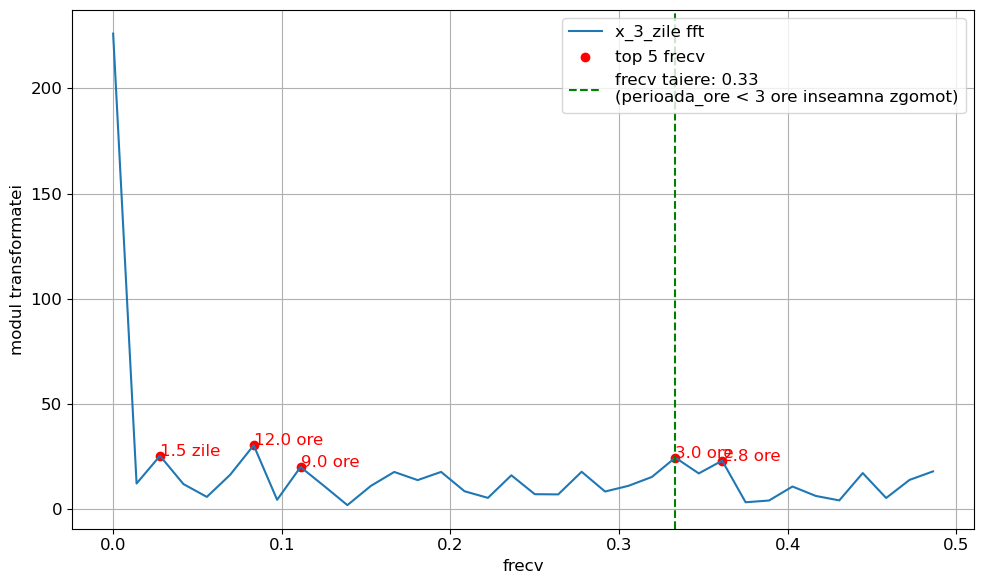

In [227]:
# c)
# approach din lab trecut
# trebuie aleasa o frecv de taiere pentru un filtru care sa elimine frecv inalte
# din plotul de mai jos, as spune ca orice frecventa sub 3 ore este zgomot si ar trebui eliminata 
# deci frecv de taiere va fi 1/3 care e mai mica decat frecv Nyquist adica 1/2
# in continuare ex vor folosi filtre ca butter si cheby1, deci frecv de taiere e normalizata intre 0 si 1 (unde 1 e frecv Nyquist)

os.makedirs("lab6/lab6_plots/ex6/c", exist_ok=True)

N = len(x_3_zile)
fs = 1 # 1 esantion pe ora
x_3_zile_fft = np.fft.fft(x_3_zile)
f = np.fft.fftfreq(N, 1/fs)
# doar frecv si mag pozitive
f_poz = f[f>=0]
X = np.abs(x_3_zile_fft[f>=0])

L_i = np.argsort(X[1:])[-5:][::-1]+1 # lista indici de 5 frecv cele mai mari, iar comp continua e exclusa
L_frecv = f[L_i]
L_mag = X[L_i]

plt.figure(figsize=(10, 6))
plt.plot(f_poz, X, label='x_3_zile fft')
plt.scatter(L_frecv, L_mag, color='red', label='top 5 frecv')

for frecv, mag in zip(L_frecv, L_mag):
    if frecv!=0:
        perioada_ore = 1/frecv
        if perioada_ore<24:
            label = f"{perioada_ore:.1f} ore"
        else:
            zile = perioada_ore/24
            label = f"{zile:.1f} zile"
    else:
        label = "comp continua"
    plt.annotate(label, (frecv, mag), color='red')
perioada_aleasa = 3
frecv_taiere = 1/perioada_aleasa
plt.axvline(x=frecv_taiere, color='green', linestyle='--', label=f'frecv taiere: {frecv_taiere:.2f}\n(perioada_ore < {perioada_aleasa} ore inseamna zgomot)')

plt.xlabel('frecv')
plt.ylabel('modul transformatei')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./lab6/lab6_plots/ex6/c/top_5_frecv_pt_alegerea_frecv_de_taiere.pdf", format='pdf')
plt.show()

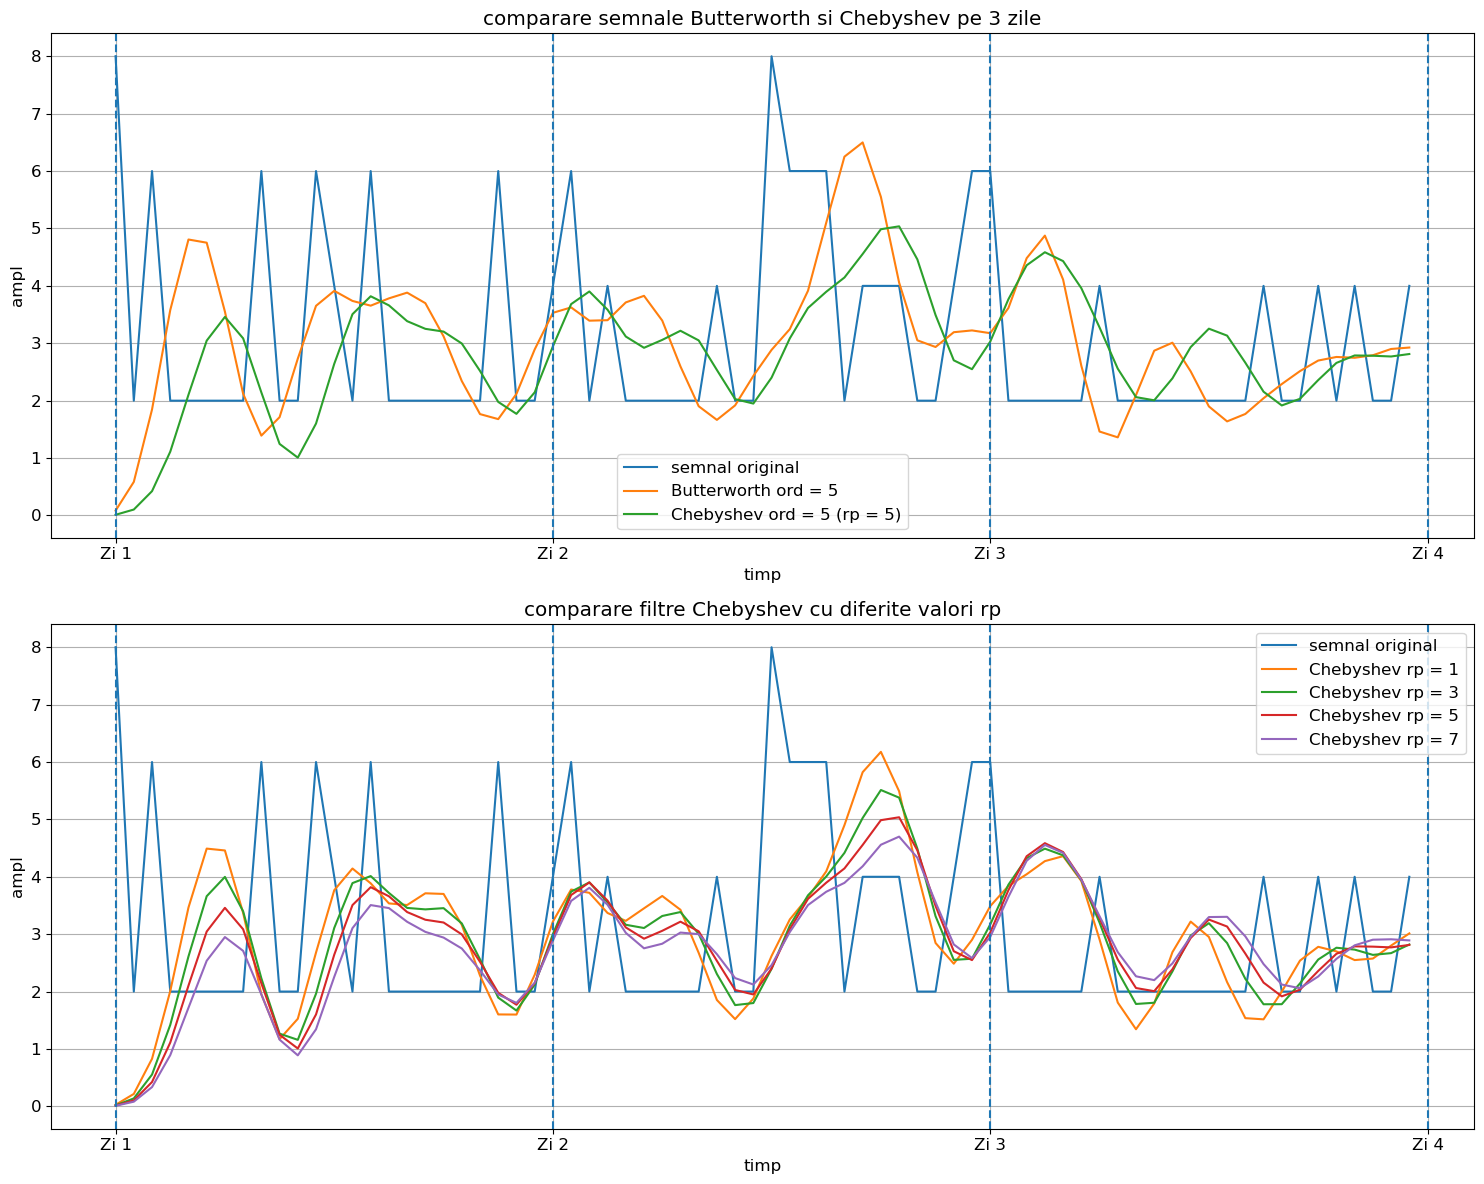

In [228]:
# d)
os.makedirs("lab6/lab6_plots/ex6/d", exist_ok=True)

ordin = 5
rp = 5 # atenuare ondulatii cheby1
b_butter, a_butter = butter(ordin, frecv_taiere, btype='low') # liste de coef
b_cheby, a_cheby = cheby1(ordin, rp, frecv_taiere, btype='low')
x_butter = lfilter(b_butter, a_butter, x_3_zile)
x_cheby = lfilter(b_cheby, a_cheby, x_3_zile)

fig, axs = plt.subplots(2, 1, figsize=(15, 12))

axs[0].plot(t_3_zile, x_3_zile, label='semnal original')
axs[0].plot(t_3_zile, x_butter, label=f'Butterworth ord = {ordin}')
axs[0].plot(t_3_zile, x_cheby, label=f'Chebyshev ord = {ordin} (rp = {rp})')
axs[0].set_xlabel('timp')
axs[0].set_ylabel('ampl')
axs[0].set_title('comparare semnale Butterworth si Chebyshev pe 3 zile')
axs[0].legend()
axs[0].grid(True)
nr_zile = 3
esantioane_zi = 24
L_tick_zi = [0+i*esantioane_zi for i in range(nr_zile+1)]
L_label_zi = [f'Zi {i+1}' for i in range(nr_zile+1)]
axs[0].set_xticks(L_tick_zi, L_label_zi)
for tick in L_tick_zi:
    axs[0].axvline(x=tick, linestyle='--')

L_rp = [1, 3, 5, 7] # diverse valori rp pt atenuarea ondulatiilor

axs[1].plot(t_3_zile, x_3_zile, label='semnal original')
for rp_val in L_rp:
    b_cheby_rp, a_cheby_rp = cheby1(ordin, rp_val, frecv_taiere, btype='low')
    x_cheby_rp = lfilter(b_cheby_rp, a_cheby_rp, x_3_zile)
    axs[1].plot(t_3_zile, x_cheby_rp, label=f'Chebyshev rp = {rp_val}')
axs[1].set_xlabel('timp')
axs[1].set_ylabel('ampl')
axs[1].set_title('comparare filtre Chebyshev cu diferite valori rp')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(L_tick_zi, L_label_zi)
for tick in L_tick_zi:
    axs[1].axvline(x=tick, linestyle='--')

plt.tight_layout()
plt.savefig("./lab6/lab6_plots/ex6/d/filtre_butterworth_chebyshev.pdf", format='pdf')
plt.show()

In [229]:
# e) e ceea ce am facut la d)
# aleg butter deoarece pastreaza mai bine forma semnalului, in timp ce cheby1 il netezeste (bazat pe acea valoare de rp increasingly)

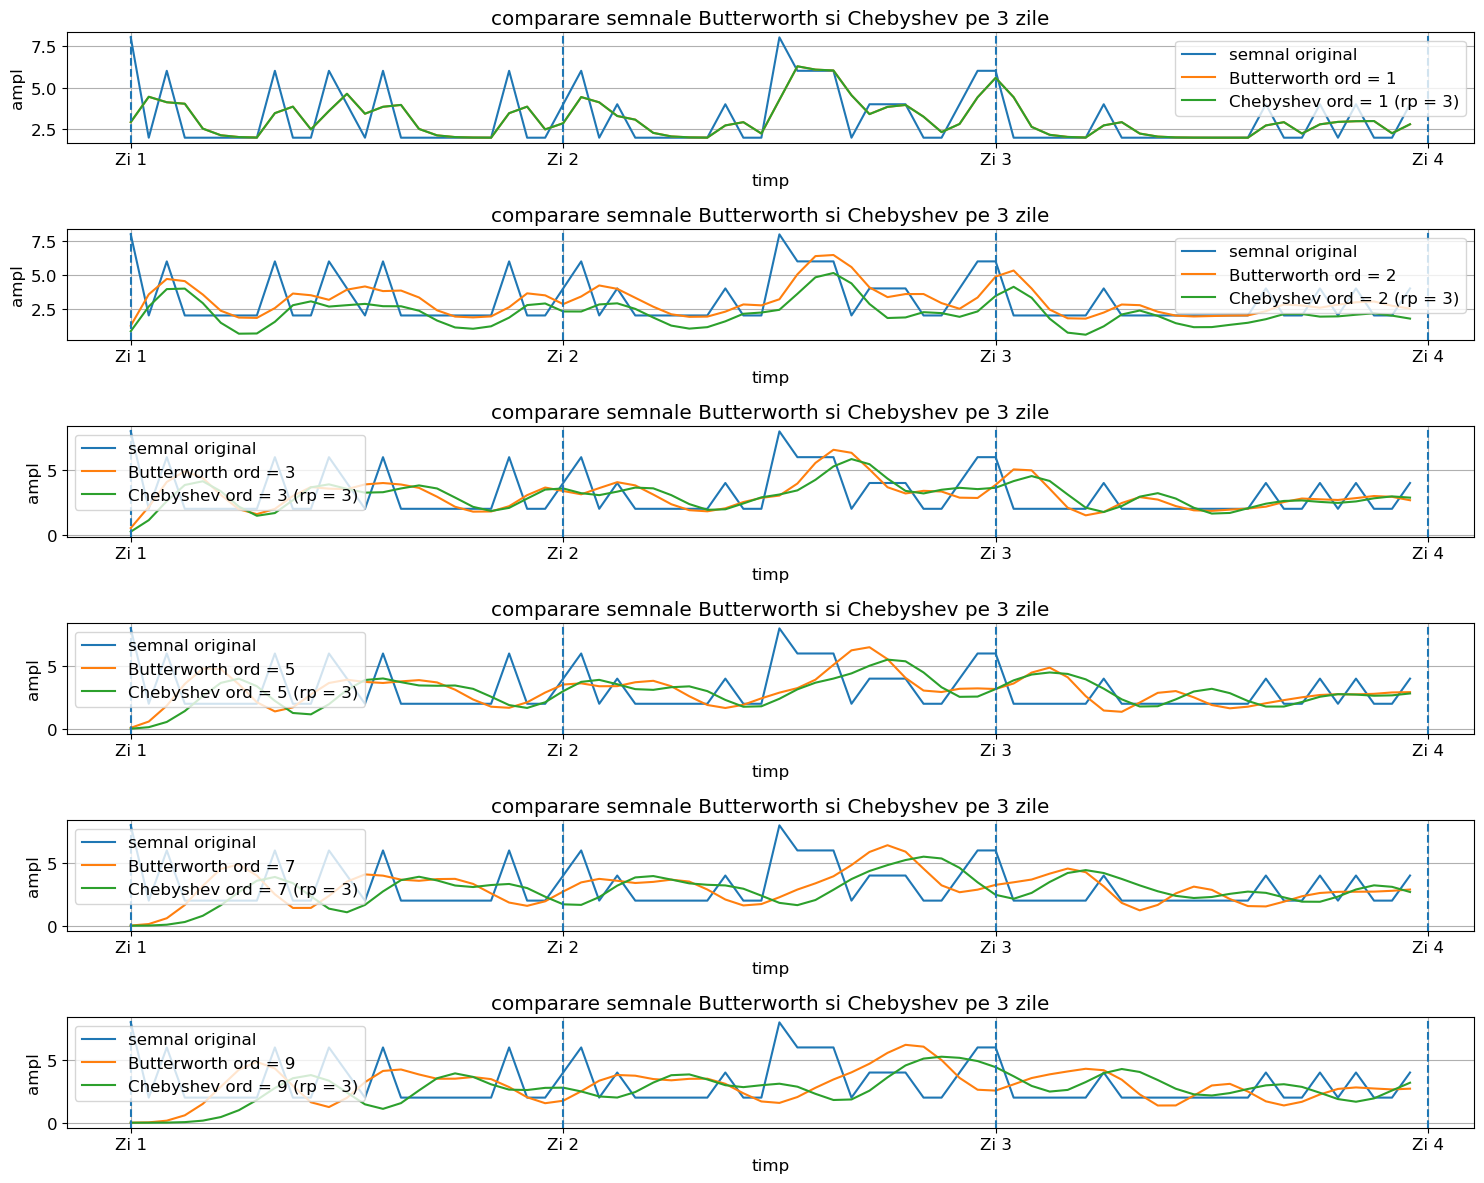

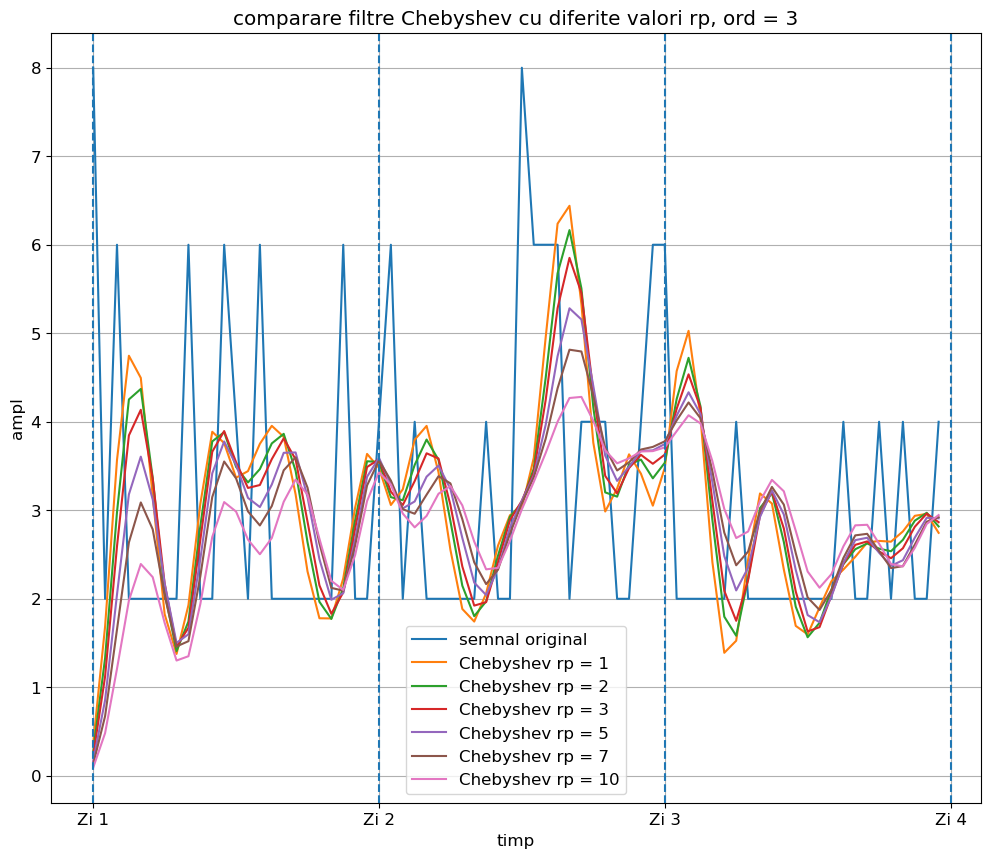

In [230]:
# f) ordin egal cu 3, rp egal cu 3
os.makedirs("lab6/lab6_plots/ex6/f", exist_ok=True)

L_ordine = [1, 2, 3, 5, 7, 9] # obs ca ordinele mai mari pierd din informatie, pe cand cele mici pastreaza zgomotul acela pentru perioade inutile de observat in decurs de 3 zile (subpunct anterior)
rp = 3 # atenuare ondulatii cheby1

fig, axs = plt.subplots(len(L_ordine), 1, figsize=(15, 12))

for i, ordin in enumerate(L_ordine):
    b_butter, a_butter = butter(ordin, frecv_taiere, btype='low') # liste de coef
    b_cheby, a_cheby = cheby1(ordin, rp, frecv_taiere, btype='low')
    x_butter = lfilter(b_butter, a_butter, x_3_zile)
    x_cheby = lfilter(b_cheby, a_cheby, x_3_zile)

    axs[i].plot(t_3_zile, x_3_zile, label='semnal original')
    axs[i].plot(t_3_zile, x_butter, label=f'Butterworth ord = {ordin}')
    axs[i].plot(t_3_zile, x_cheby, label=f'Chebyshev ord = {ordin} (rp = {rp})')
    axs[i].set_xlabel('timp')
    axs[i].set_ylabel('ampl')
    axs[i].set_title('comparare semnale Butterworth si Chebyshev pe 3 zile')
    axs[i].legend()
    axs[i].grid(True)
    nr_zile = 3
    esantioane_zi = 24
    L_tick_zi = [0+i*esantioane_zi for i in range(nr_zile+1)]
    L_label_zi = [f'Zi {i+1}' for i in range(nr_zile+1)]
    axs[i].set_xticks(L_tick_zi, L_label_zi)
    for tick in L_tick_zi:
        axs[i].axvline(x=tick, linestyle='--')
plt.tight_layout()
plt.savefig("./lab6/lab6_plots/ex6/f/filtre_butterworth_chebyshev_diferite_valori_ordin.pdf", format='pdf')
plt.show()

# aleg ca si ordin ideal 3
ordin = 3
L_rp = [1, 2, 3, 5, 7, 10] # diverse valori rp pt atenuarea ondulatiilor, valori mari presupun o netezire brusca, in timp ce valori mici pastreaza un echilibru

plt.plot(t_3_zile, x_3_zile, label='semnal original')
for rp_val in L_rp:
    b_cheby_rp, a_cheby_rp = cheby1(ordin, rp_val, frecv_taiere, btype='low')
    x_cheby_rp = lfilter(b_cheby_rp, a_cheby_rp, x_3_zile)
    plt.plot(t_3_zile, x_cheby_rp, label=f'Chebyshev rp = {rp_val}')
plt.xlabel('timp')
plt.ylabel('ampl')
plt.title('comparare filtre Chebyshev cu diferite valori rp, ord = 3')
plt.legend()
plt.grid(True)
plt.xticks(L_tick_zi, L_label_zi)
for tick in L_tick_zi:
    plt.axvline(x=tick, linestyle='--')
plt.savefig("./lab6/lab6_plots/ex6/f/filtre_chebyshev_diverse_valori_rp_ordin_3.pdf", format='pdf')
plt.show()
# aleg pentru ordinul 3, rp egal cu 3
